In [7]:
import networkx as nx
import numpy as np
import kernelPCA
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics.cluster import adjusted_rand_score


In [8]:
#拡散カーネルのハイパーパラメータ
T =0.5

#Kmedoidsのクラスタ数
N_CLUSTER = 2

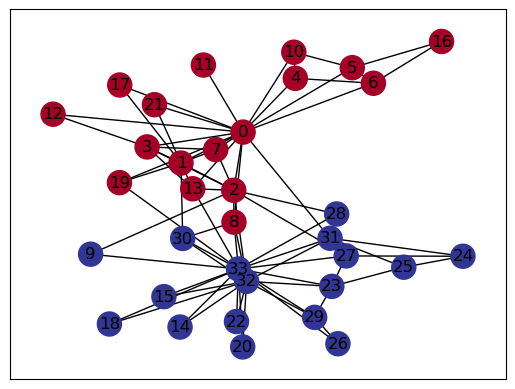

=====this uses weight_infomation=====


/Users/taira_no_mac/Documents/GitHub/KernelPCA/kernelPCA.py:19: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  matrix = np.array(nx.adjacency_matrix(G).todense().astype(int))


In [9]:
#karateclubのグラフインスタンス取得
G = nx.karate_club_graph()

#karateclubの可視化且つ、正しいクラスタラベル所得
true_label = kernelPCA.draw_karateclub(G)

#karateclubインスタンスから隣接行列（ndarray）取得
adj = kernelPCA.nx_to_adj(G,use_weight=True)

#隣接行列を入力として、ラプラシアン行列（ndarray）を取得
lap = kernelPCA.adj_to_lap(adj)

#ラプラシアン行列を入力としてカーネル行列の取得
# [lap:ラプラシアン行列(ndarray), T:拡散カーネルのパラメータ(float)]
matrix = kernelPCA.diffusion_kernel(lap,T)

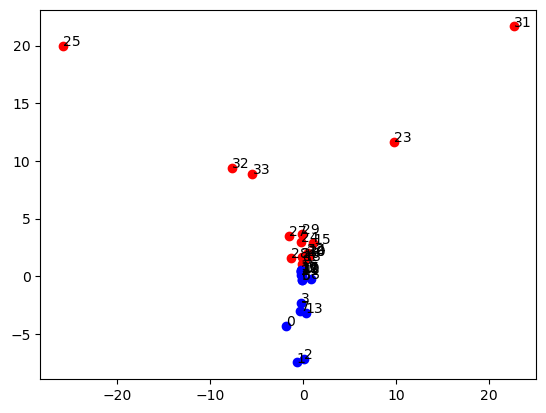

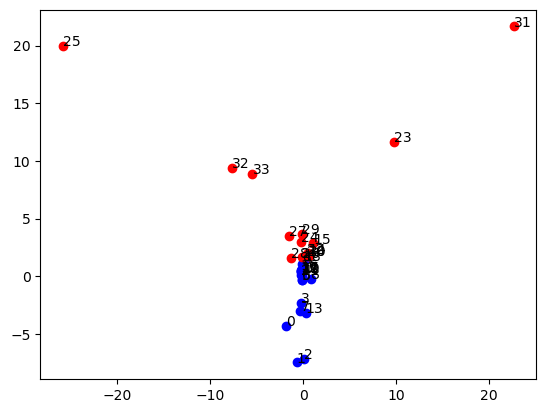

0.7717250324254216

In [10]:
model = kernelPCA.PCA(n_components=2)
model.fit(matrix)

Y = model.transform(matrix)

#埋め込み後のベクトルデータの可視化
kernelPCA.draw_embedded_vector(Y,true_label)

#クラスタリング
pred = KMedoids(n_clusters = N_CLUSTER,random_state=0).fit_predict(Y)

#可視化
kernelPCA.draw_embedded_vector(Y, pred)

#ARI算出
adjusted_rand_score(true_label, pred)


In [11]:
name = "kpca_"+str(N_CLUSTER)+".txt"
with open(name, 'w') as f:
    for i in range(len(pred)):
        if i+1 == len(pred):
            f.write(str(pred[i]))
        else:
            f.write(str(pred[i])+',')


In [12]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])